In [1]:
# SENTIMENT ANALYSIS FOR PRODUCT RATING

In [2]:
# IMPORTING LIBRARY
from bs4 import BeautifulSoup
import requests
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns

In [3]:
url_1 = "https://www.amazon.in/Amazon-Brand-12-inch-Roulette-Movement/product-reviews/B076VF43GG/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber="
url_2 = "https://www.amazon.in/Kuber-Industries-Numerical-Standard-HS39KUBMART022867/product-reviews/B097ZXC53D/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber="
url_3 = "https://www.amazon.in/Freny-Exim-Wooden-Clock-Wenge/product-reviews/B09J561NTR/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber="
url_4 = "https://www.amazon.in/Ajanta-Quartz-Clock-White-Silver/product-reviews/B01N6OOW52/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber="
url_5 = "https://www.amazon.in/Heart-Home-Simple-Numerical-Standard/product-reviews/B0982ZYTRS/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber="
url_6 = "https://www.amazon.in/Micro-Edge-Anti-Glare-Graphics-Speakers-15S-Eq2143Au/product-reviews/B09R1MMMTH/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber="

In [4]:
one_line=[]
reviews=[]
positive=[]
neutral=[]
negative=[]
compound=[]
for pageNo in range(1,50):
    url = url_6+str(pageNo)
    response = requests.get(url)
    soup = BeautifulSoup(response.text , 'html.parser')

    #review = soup.find('span',attrs={'class':'a-size-base review-text review-text-content'})
    #review=review.text
    #print(review)

    for customer in soup.find_all('div',attrs={'class':'a-section review aok-relative'}):
        getOneLine = customer.find('a',attrs={'class':'a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold'})
        oneLineText = getOneLine.text
        #print (oneLineText)
        oneLineText = oneLineText.replace(',','')
        getReview = customer.find('span',attrs={'class':'a-size-base review-text review-text-content'})
        reviewText = getReview.text
        #print(reviewText)
        reviewText = reviewText.replace(',','')
        one_line.append(oneLineText.strip("\n"))
        reviews.append(reviewText.strip("\n"))
        
df = pd.DataFrame()
df['One Line']=one_line
df['Reviews']=reviews
df

,One Line,Reviews
0,Best Laptop under 40k,This laptop is perfect for home and student us...
1,Ryzen 3 3250U much better than core i3 10th ...,One of the best product at this price....
2,All in all,Very good .... After use of 9 months (updated)
3,Highly recommended. Go for it.,Best laptop under 40k. 1TB HDD 256GB SSD 8GB R...
4,Poor laptop for 41K - freezes with MS Teams,I bought this laptop for remote schooling of k...
...,...,...
365,Average performance,Ita good but can be better. Hang bhaut hota ha...
366,With 256Gb ssd its experience becomes smoother,Battery life was not that much good. Rest is f...
367,Amazing product,Build quality is too good
368,Good choice under 40k,Nice one


In [5]:
analyzer = SentimentIntensityAnalyzer()
for n in range(df.shape[0]):
    first_column = df.iloc[n,0]
    second_column = df.iloc[n,1]
    line_analyze = analyzer.polarity_scores(first_column)
    review_analyze = analyzer.polarity_scores(second_column)
    positive.append(((line_analyze['pos'])+(review_analyze['pos']))/2)
    neutral.append(((line_analyze['neu'])+(review_analyze['neu']))/2)
    negative.append(((line_analyze['neg'])+(review_analyze['neg']))/2)
    compound.append(((line_analyze['compound'])+(review_analyze['compound']))/2)

df["Positive"]=positive
df["Neutral"]=neutral
df["Negative"]=negative
df["Compound"]=compound
pd.set_option("display.max_rows", None, "display.max_columns", None)
df

,One Line,Reviews,Positive,Neutral,Negative,Compound
0,Best Laptop under 40k,This laptop is perfect for home and student us...,0.3290,0.6485,0.0220,0.78010
1,Ryzen 3 3250U much better than core i3 10th ...,One of the best product at this price....,0.3095,0.6905,0.0000,0.53865
2,All in all,Very good .... After use of 9 months (updated),0.1425,0.8575,0.0000,0.24635
3,Highly recommended. Go for it.,Best laptop under 40k. 1TB HDD 256GB SSD 8GB R...,0.2540,0.7460,0.0000,0.46010
4,Poor laptop for 41K - freezes with MS Teams,I bought this laptop for remote schooling of k...,0.0225,0.7270,0.2505,-0.58165
5,Does not work with microsoft teams app. it fre...,I don't know how I missed the review given by ...,0.0225,0.8180,0.1595,-0.49140
6,Good,The media could not be loa...,0.6190,0.2900,0.0910,0.33980
7,8 gb ram and 256 ssd still laptop and its task...,The media could not be loa...,0.0180,0.9350,0.0465,-0.21075
8,Unsure of the Configuration,This laptop is overall a really good package b...,0.0500,0.7345,0.2160,0.19615
9,Damaged product received and Amazon not pickin...,Received damaged laptop and it has been two we...,0.0990,0.7495,0.1510,-0.48305


<AxesSubplot:>

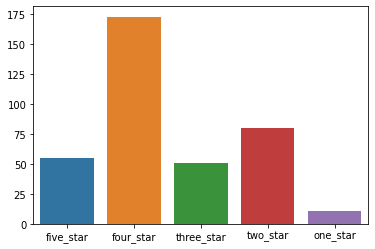

In [6]:
total_score=0
one_star = 0
two_star = 0
three_star = 0
four_star = 0
five_star = 0
for n in range(df.shape[0]):
    if(df.iloc[n,5]>=0.6):
        five_star+=1
    elif(df.iloc[n,5]<0.6 and df.iloc[n,5]>0.1):
        four_star+=1
    elif(df.iloc[n,5]<=0.1 and df.iloc[n,5]>=-0.1):
        three_star+=1
    elif(df.iloc[n,5]<-0.1 and df.iloc[n,5]>-0.6):
        two_star+=1
    elif(df.iloc[n,5]<=-0.6):
        one_star+=1

x_value = ['five_star','four_star','three_star','two_star','one_star']
y_value = [five_star,four_star,three_star,two_star,one_star]
sns.barplot(x=x_value,y=y_value)

In [7]:
def function(link):
    one_line=[]
    reviews=[]
    positive=[]
    neutral=[]
    negative=[]
    compound=[]
    for pageNo in range(1,50):
        url = link+str(pageNo)
        response = requests.get(url)
        soup = BeautifulSoup(response.text , 'html.parser')

        for customer in soup.find_all('div',attrs={'class':'a-section review aok-relative'}):
            getOneLine = customer.find('a',attrs={'class':'a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold'})
            oneLineText = getOneLine.text
            oneLineText = oneLineText.replace(',','')
            getReview = customer.find('span',attrs={'class':'a-size-base review-text review-text-content'})
            reviewText = getReview.text
            reviewText = reviewText.replace(',','')
            one_line.append(oneLineText.strip("\n"))
            reviews.append(reviewText.strip("\n"))
        
    df = pd.DataFrame()
    df['One Line']=one_line
    df['Reviews']=reviews
    
    analyzer = SentimentIntensityAnalyzer()
    for n in range(df.shape[0]):
        first_column = df.iloc[n,0]
        second_column = df.iloc[n,1]
        line_analyze = analyzer.polarity_scores(first_column)
        review_analyze = analyzer.polarity_scores(second_column)
        compound.append(((line_analyze['compound'])+(review_analyze['compound']))/2)

    df["Compound"]=compound
    total_score = 0
    for n in range(df.shape[0]):
        total_score += df.iloc[n,2]
        
    average = total_score/df.shape[0]
    return average

In [ ]:
average_1 = function(url_1)
#print(average_1)
average_2 = function(url_2)
average_3 = function(url_3)
average_4 = function(url_4)
average_5 = function(url_5)
average_6 = function(url_6)
horizontal = ['average_1','average_2','average_3','average_4','average_5','average_6']
vertical = [average_1,average_2,average_3,average_4,average_5,average_6]
print(vertical)
sns.barplot(x=horizontal,y=vertical)